# Data Analysis Project 1 - Worldwide Alcohol Consumption Analysis


# How is alcohol consumption different across geography?



## Part One - Basic Set Up

In [131]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from IPython.display import display
import seaborn as sn
from pandas import DataFrame
import requests
import gmaps
import os
from pprint import pprint
import re 

# Import API key
from api_keys import g_key
from api_keys import weather_key

In [132]:
# File to load
final_file = "Resources/mega_df.csv"

# Read csv and store into Pandas DataFrames
df = pd.read_csv(final_file)

In [133]:
# Drop duplicate indexes
df.drop('Unnamed: 0', axis=1, inplace=True)
df.drop('index', axis=1, inplace=True)
df.drop('code', axis=1, inplace=True)

# Display first five records of dataframe
df_copy = df
df.head() 

,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,mental_health_and_addiction (%),capital
0,Asia,AFG,Afghanistan,0.2,arid to semiarid; cold winters and hot summers,Fruit and nuts,small-scale production of bricks,South Asia,2.5669,52.590000,7.462861,17.553463,Kabul
1,Europe,ALB,Albania,7.5,"mild temperate; cool, cloudy, wet winters; hot...",Chromium and chrome products,perfumes and cosmetic products,Central and Eastern Europe,4.8827,68.708138,9.417931,10.987610,Tirana
2,Africa,DZA,Algeria,0.9,"arid to semiarid; mild, wet winters with hot, ...",Oil,petroleum,Middle East and North Africa,5.0051,65.905174,9.537965,14.700388,Algiers
3,Europe,AND,Andorra,11.3,"temperate; snowy, cold winters and warm, dry s...",Tobacco products,tourism,NaN,NaN,NaN,NaN,14.726869,Andorra la Vella
4,Africa,AGO,Angola,6.4,semiarid in south and along coast to Luanda; n...,Oil,petroleum,NaN,NaN,NaN,NaN,12.498281,Luanda


## Part Two - Data Summary
* Display a list of columns in the dataset
* Display a list of regions in the dataset
* Display a list of countries in the dataset
* Calculate total number of countries
* Calculate overall average alcohol consumption

####  Display a list of columns

In [134]:
columns = df.columns
columns_string =', '.join(columns)
print(f"List of column names: {columns_string}")

List of column names: continent, country_code, country, consumption_per_capita_(L), climate, main_export, main_industry, region, happy_score, life_expectancy, gdp_per_capita, mental_health_and_addiction (%), capital


#### Display a list of regions

In [135]:
regions = df["region"].unique()
regions_string = ", ".join(map(str, regions))

print(f"List of regions represented in the dataset: {regions_string}")
regions

DataFrame.dropna

List of regions represented in the dataset: South Asia, Central and Eastern Europe, Middle East and North Africa, nan, Commonwealth of Independent States, Latin America and Caribbean, North America and ANZ, Western Europe, Sub-Saharan Africa, Southeast Asia, East Asia


<function pandas.core.frame.DataFrame.dropna(self, axis=0, how='any', thresh=None, subset=None, inplace=False)>

#### Display a list of countries

In [136]:
countries = set(df['country'])
countries_string = ', '.join(countries)

print(f"List of countries represented in the dataset: {countries_string}")

List of countries represented in the dataset: Barbados, Bulgaria, Benin, Sudan, Chad, Thailand, Bhutan, Timor, Uzbekistan, India, Angola, Serbia, Qatar, Mauritius, Azerbaijan, Saint Vincent and the Grenadines, Vanuatu, Solomon Islands, Finland, Tonga, Cameroon, Oman, Micronesia (country), Guyana, Guinea-Bissau, Antigua and Barbuda, Latvia, United Arab Emirates, Congo, Laos, Gambia, France, Jordan, North Korea, Uganda, Cambodia, South Korea, Costa Rica, Guatemala, Armenia, Comoros, Cyprus, Ghana, Tajikistan, Cuba, Djibouti, Sri Lanka, Eswatini, Portugal, Central African Republic, Tunisia, Eritrea, Nauru, Ecuador, Norway, Japan, Maldives, Mongolia, Bolivia, Suriname, Brazil, Burundi, Canada, Namibia, Madagascar, Belarus, Cape Verde, Mozambique, Nicaragua, Saudi Arabia, Bangladesh, Burkina Faso, Lithuania, Luxembourg, Philippines, Seychelles, Honduras, Myanmar, Haiti, Yemen, Greece, Israel, Moldova, Sierra Leone, Venezuela, North Macedonia, Nepal, Poland, Saint Kitts and Nevis, Ukraine, S

####  Calculate how many countries are represented in the data 

In [137]:
total_countries = df.shape[0] 
print(f'The total number of rows countries represented in the dataset are {total_countries}.') 

# Alternative methods:
#number_countries = df_11['country'].nunique()
# unique_countries = df_8['country'].unique()
# number_countries = len(unique_countries)

The total number of rows countries represented in the dataset are 186.


#### Find how many values (countries) there are for each continent and list the names of the countries, grouped by continent


In [138]:
# South America
south_america_df = df.loc[df["continent"] == "South America"]
south_america = south_america_df["country"].tolist()
countries_in_south_america = len(south_america_df)

# North America
north_america_df = df.loc[df["continent"] == "North America"]
north_america = north_america_df["country"].tolist() 
countries_in_north_america = len(north_america_df)

# Europe 
europe_df = df.loc[df["continent"] == "Europe"]
europe = europe_df["country"].tolist() 
countries_in_europe = len(europe_df)

# Africa 
africa_df = df.loc[df["continent"] == "Africa"]
africa = africa_df["country"].tolist() 
countries_in_africa = len(africa_df)

# Oceania
oceania_df = df.loc[df["continent"] == "Oceania"]
oceania = oceania_df["country"].tolist() 
countries_in_oceania = len(oceania_df)


print("--------------------------------------------------------------------------------------")
print("The countries in South America represented: " + ", ".join(south_america))  
print("--------------------------------------------------------------------------------------")
print("The countries in North America represented: " + ", ".join(north_america))  
print("--------------------------------------------------------------------------------------")
print("The countries in Europe represented: " + ", ".join(europe))  
print("--------------------------------------------------------------------------------------")
print("The countries in Africa represented: " + ", ".join(africa))  
print("--------------------------------------------------------------------------------------")
print("The countries in Oceania represented: " + ", ".join(oceania))  


--------------------------------------------------------------------------------------
The countries in South America represented: Argentina, Bolivia, Brazil, Chile, Colombia, Ecuador, Guyana, Paraguay, Peru, Suriname, Uruguay, Venezuela
--------------------------------------------------------------------------------------
The countries in North America represented: Antigua and Barbuda, Bahamas, Barbados, Belize, Canada, Costa Rica, Cuba, Dominica, Dominican Republic, El Salvador, Grenada, Guatemala, Haiti, Honduras, Jamaica, Mexico, Nicaragua, Panama, Saint Kitts and Nevis, Saint Lucia, Saint Vincent and the Grenadines, Trinidad and Tobago, United States
--------------------------------------------------------------------------------------
The countries in Europe represented: Albania, Andorra, Azerbaijan, Austria, Armenia, Belgium, Bosnia and Herzegovina, Bulgaria, Belarus, Croatia, Cyprus, Czechia, Denmark, Estonia, Finland, France, Georgia, Germany, Greece, Hungary, Iceland, Ireland

#### Display how many countries are in each region

In [139]:
df['region'].value_counts() 

Sub-Saharan Africa                    34
Latin America and Caribbean           21
Western Europe                        20
Middle East and North Africa          16
Central and Eastern Europe            14
Commonwealth of Independent States    12
Southeast Asia                         9
South Asia                             7
East Asia                              4
North America and ANZ                  4
Name: region, dtype: int64

#### Display which countries are in each region

#### Display the average alcohol consumption across the world

In [140]:
overall_avg_consumption = df["consumption_per_capita_(L)"].mean() 
overall_avg_consumption
formatted_consumption = round(overall_avg_consumption,2)

print(f"The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is {overall_avg_consumption}.")  


The overall average of alcohol consumption per capita (liters) among countries represented in the dataset is 6.165053763440862.


#### Summarize Results 

In [141]:
print(f"List of column names: {columns_string}")
print("------------------------------------------------------------------------------------------")
print(f"List of regions represented in the dataset: {regions_string}")
print("------------------------------------------------------------------------------------------")
print(f"List of countries represented in the dataset: {countries_string}")
print("------------------------------------------------------------------------------------------")
print(f"Total number of countries represented in the dataset: {total_countries}")
print("------------------------------------------------------------------------------------------")
print("The countries in South America represented: " + ", ".join(south_america))  
print("--------------------------------------------------------------------------------------")
print("The countries in North America represented: " + ", ".join(north_america))  
print("--------------------------------------------------------------------------------------")
print("The countries in Europe represented: " + ", ".join(europe))  
print("--------------------------------------------------------------------------------------")
print("The countries in Africa represented: " + ", ".join(africa))  
print("--------------------------------------------------------------------------------------")
print("The countries in Oceania represented: " + ", ".join(oceania))  
print("--------------------------------------------------------------------------------------")
print(f"Overall average of alcohol consumption per capita (liters): {formatted_consumption}") 
print("------------------------------------------------------------------------------------------")

List of column names: continent, country_code, country, consumption_per_capita_(L), climate, main_export, main_industry, region, happy_score, life_expectancy, gdp_per_capita, mental_health_and_addiction (%), capital
------------------------------------------------------------------------------------------
List of regions represented in the dataset: South Asia, Central and Eastern Europe, Middle East and North Africa, nan, Commonwealth of Independent States, Latin America and Caribbean, North America and ANZ, Western Europe, Sub-Saharan Africa, Southeast Asia, East Asia
------------------------------------------------------------------------------------------
List of countries represented in the dataset: Barbados, Bulgaria, Benin, Sudan, Chad, Thailand, Bhutan, Timor, Uzbekistan, India, Angola, Serbia, Qatar, Mauritius, Azerbaijan, Saint Vincent and the Grenadines, Vanuatu, Solomon Islands, Finland, Tonga, Cameroon, Oman, Micronesia (country), Guyana, Guinea-Bissau, Antigua and Barbuda,

## Part Three - Consumption Levels by Country
* Group alcohol consumption within 5 bins and display as new column within dataframe
* Display value counts for each bin
* Create a for loop to separate each bin as its own dataframe
* Calculate values for each bin
* Display correlation matrix

#### Create bins and add results to dataframe

In [142]:
# Create bins
df_test = pd.cut(df["consumption_per_capita_(L)"], bins=5)
cut_labels = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
cut_bins = [0, 1, 4, 7, 10, 20]
df["Drinking_Bins"] = pd.cut(df["consumption_per_capita_(L)"], bins=cut_bins, labels=cut_labels)

# Display bin distribution 
df["Drinking_Bins"].value_counts()

Heavy         45
Light         40
Very Heavy    37
Medium        36
Very Light    23
Name: Drinking_Bins, dtype: int64

In [143]:
# Create a for loop to create separate dataframes for each bin 
drinking_bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]
consumption_values = []
country_number = []

for drinking_bins in drinking_bins:
    bins_df = df.loc[df["Drinking_Bins"] == drinking_bins]
    
    values=bins_df["consumption_per_capita_(L)"].sum()
    consumption_values.append(values)
    
    number = len(df)
    country_number.append(number)
    
    avg_consumption_bins = np.array([consumption_values])/np.array([country_number])

print(avg_consumption_bins)

[[0.07311828 0.54408602 1.09301075 2.0844086  2.37043011]]


In [144]:
#Create a dataframe for each bin 
very_light_df = df.loc[df['Drinking_Bins']=='Very Light']

very_light_df.round(2)
#averages
very_light_consumption = very_light_df["consumption_per_capita_(L)"].mean()
very_light_happiness = very_light_df["happy_score"].mean()
very_light_life = very_light_df["life_expectancy"].mean()
very_light_gdp = very_light_df["gdp_per_capita"].mean()
very_light_addiction = very_light_df["mental_health_and_addiction (%)"].mean()

print(very_light_consumption)
print(very_light_happiness)
print(very_light_life)
print(very_light_gdp)
print(very_light_addiction)

0.591304347826087
4.784356251312501
61.586327790625006
8.9320933815
13.588588626086958


#### Calculate Values For Each Bin

In [145]:
# Calculate values for 'light' drinkers
light_df = df.loc[df['Drinking_Bins']=='Light']
light_consumption = light_df["consumption_per_capita_(L)"].mean()
light_happiness = light_df["happy_score"].mean()
light_life = light_df["life_expectancy"].mean()
light_gdp = light_df["gdp_per_capita"].mean()
light_addiction = light_df["mental_health_and_addiction (%)"].mean()

print(light_consumption,light_happiness,light_life, light_gdp,light_addiction)

# Calculate values for 'medium' drinkers
medium_df = df.loc[df['Drinking_Bins']=='Medium']
medium_consumption = medium_df["consumption_per_capita_(L)"].mean()
medium_happiness = medium_df["happy_score"].mean()
medium_life = medium_df["life_expectancy"].mean()
medium_gdp = medium_df["gdp_per_capita"].mean()
medium_addiction = medium_df["mental_health_and_addiction (%)"].mean()

print(medium_consumption,medium_happiness,medium_life,medium_gdp,medium_addiction)

# Calculate values for 'heavy' drinkers
heavy_df = df.loc[df['Drinking_Bins']=='Heavy']
heavy_consumption = heavy_df["consumption_per_capita_(L)"].mean()
heavy_happiness = heavy_df["happy_score"].mean()
heavy_life = heavy_df["life_expectancy"].mean()
heavy_gdp = heavy_df["gdp_per_capita"].mean()
heavy_addiction = heavy_df["mental_health_and_addiction (%)"].mean()

print(heavy_consumption, heavy_happiness, heavy_life, heavy_gdp, heavy_addiction)

# Calculate values for 'heavy' drinkers
heavy_df = df.loc[df['Drinking_Bins']=='Heavy']
heavy_consumption = heavy_df["consumption_per_capita_(L)"].mean()
heavy_happiness = heavy_df["happy_score"].mean()
heavy_life = heavy_df["life_expectancy"].mean()
heavy_gdp = heavy_df["gdp_per_capita"].mean()
heavy_addiction = heavy_df["mental_health_and_addiction (%)"].mean()

print(heavy_consumption, heavy_happiness, heavy_life, heavy_gdp, heavy_addiction)

# Calculate values for 'very heavy' drinkers
very_heavy_df = df.loc[df['Drinking_Bins']=='Very Heavy']
very_heavy_consumption = very_heavy_df["consumption_per_capita_(L)"].mean()
very_heavy_happiness = very_heavy_df["happy_score"].mean()
very_heavy_life = very_heavy_df["life_expectancy"].mean()
very_heavy_gdp = very_heavy_df["gdp_per_capita"].mean()
very_heavy_addiction = very_heavy_df["mental_health_and_addiction (%)"].mean()

print(very_heavy_consumption,very_heavy_happiness,very_heavy_life,very_heavy_gdp,very_heavy_addiction)

2.53 5.2051606944642845 61.61110319428571 8.570028322035714 12.353983505128205
5.647222222222223 5.079172010480001 62.664390411599996 8.762150802640003 12.320441922571424
8.615555555555556 5.629619986657144 65.8943797522857 9.568910789999997 13.171500725681824
8.615555555555556 5.629619986657144 65.8943797522857 9.568910789999997 13.171500725681824
11.916216216216217 6.302539377515151 69.08792576666667 10.252519087363638 13.515031362162162


#### Create Correlations Matrix

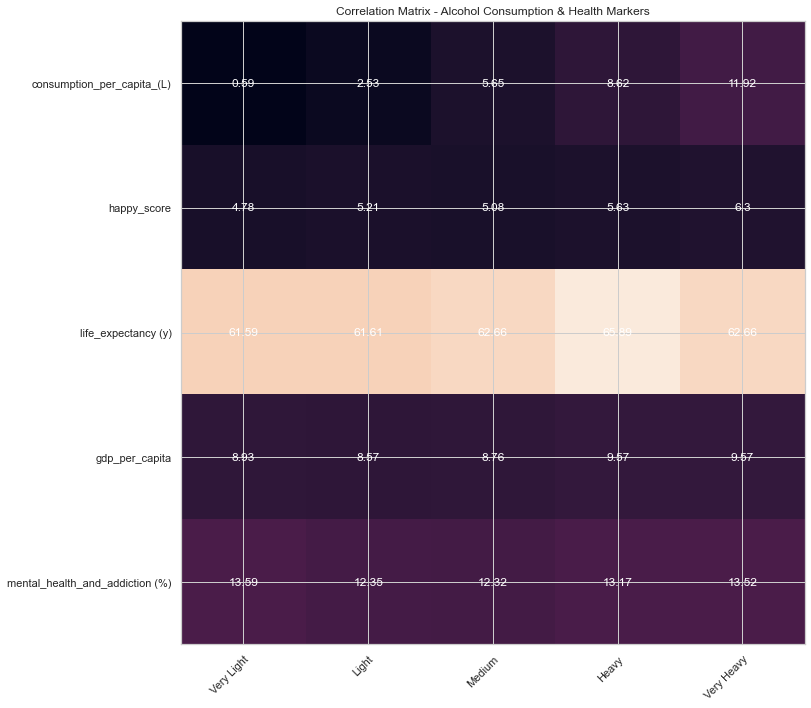

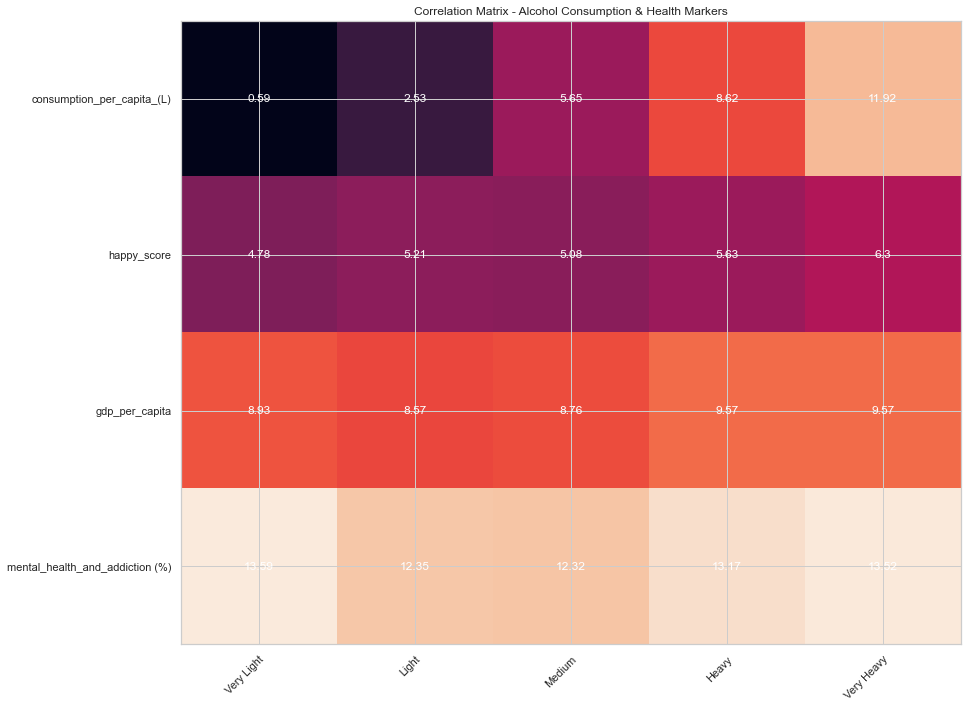

In [146]:
Labels = ["consumption_per_capita_(L)", "happy_score", "life_expectancy (y)", "gdp_per_capita", "mental_health_and_addiction (%)"]
Bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]

#Creates array and rounds to 2 decimal places
data = np.around([[very_light_consumption,light_consumption,medium_consumption,heavy_consumption,very_heavy_consumption],
                 [very_light_happiness,light_happiness,medium_happiness,heavy_happiness,very_heavy_happiness],
                 [very_light_life,light_life,medium_life,heavy_life,medium_life],
                 [very_light_gdp,light_gdp,medium_gdp,heavy_gdp,heavy_gdp],
                 [very_light_addiction,light_addiction,medium_addiction,heavy_addiction,very_heavy_addiction]], decimals=2)

fig, ax = plt.subplots()
im = ax.imshow(data)

#define bounds of array equal to number of labels
ax.set_xticks(np.arange(len(Bins)))
ax.set_yticks(np.arange(len(Labels)))
#Label each Axis
ax.set_xticklabels(Bins)
ax.set_yticklabels(Labels)
#Rotate Labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(Labels)):
    for j in range(len(Bins)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

ax.set_title("Correlation Matrix - Alcohol Consumption & Health Markers")
fig.tight_layout()
plt.show()



Labels = ["consumption_per_capita_(L)", "happy_score", "gdp_per_capita", "mental_health_and_addiction (%)"]
Bins = ["Very Light", "Light", "Medium", "Heavy", "Very Heavy"]

#Creates array and rounds to 2 decimal places
data = np.around([[very_light_consumption,light_consumption,medium_consumption,heavy_consumption,very_heavy_consumption],
                 [very_light_happiness,light_happiness,medium_happiness,heavy_happiness,very_heavy_happiness],
                 [very_light_gdp,light_gdp,medium_gdp,heavy_gdp,heavy_gdp],
                 [very_light_addiction,light_addiction,medium_addiction,heavy_addiction,very_heavy_addiction]], decimals=2)



#Excluding Life Expectancy


fig, ax = plt.subplots()
im = ax.imshow(data)

#define bounds of array equal to number of labels
ax.set_xticks(np.arange(len(Bins)))
ax.set_yticks(np.arange(len(Labels)))
#Label each Axis
ax.set_xticklabels(Bins)
ax.set_yticklabels(Labels)
#Rotate Labels
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")


for i in range(len(Labels)):
    for j in range(len(Bins)):
        text = ax.text(j, i, data[i, j],
                       ha="center", va="center", color="w")
        

ax.set_title("Correlation Matrix - Alcohol Consumption & Health Markers")
fig.tight_layout()
plt.show()


## Part Four - Drunkest Countries
* Identify the 5 countries with the highest alcohol consumption
* Identify the 5 countries with the lowest alcohol consumption
* Create a pie chart to display consumption for 5 countries with highest alcohol 


#### Find the 5 countries that consumes the most alcohol 

In [147]:
high_consumption = df.sort_values([("consumption_per_capita_(L)")], ascending=False).head(n=5)
high_consumption.reset_index() 

capitals = high_consumption['capital'].tolist() 
capitals


most_alcohol = high_consumption["country"].tolist() 

print("The countries with the highest consumption rates: " + ", ".join(most_alcohol))


The countries with the highest consumption rates: Moldova, Lithuania, Czechia, Germany, Nigeria


#### Find the 5 countries that consumes the least alcohol 

In [148]:
low_consumption = df.sort_values([("consumption_per_capita_(L)")], ascending=True).head(n=5)
low_consumption

least_alcohol = low_consumption["country"].tolist() 

print("The countries with the lowest consumption rates: " + ", ".join(least_alcohol))

The countries with the lowest consumption rates: Kuwait, Libya, Mauritania, Somalia, Bangladesh


#### Create a pie chart to display consumption in top 5 countries relative to the larger world

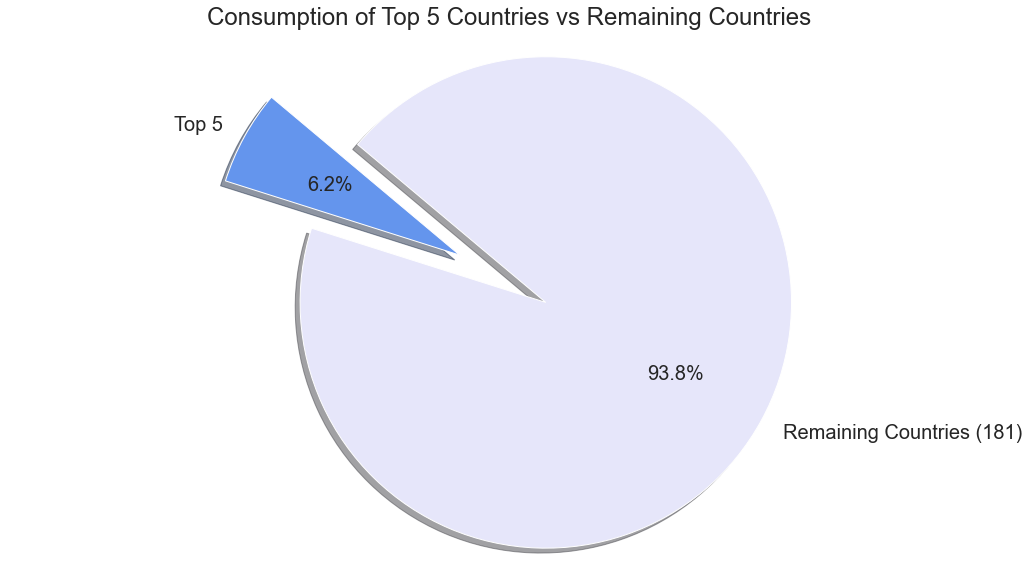

In [149]:
sum_top_5 = high_consumption['consumption_per_capita_(L)'].sum()
total = df['consumption_per_capita_(L)'].sum()

difference = total - sum_top_5
sum_top_5 

my_list = [71.4,1075.3]
labels = ["Top 5", "Remaining Countries (181)"]
colors = ['cornflowerblue', 'lavender']
explode = (0.4, 0)
textprops={'fontsize': 20}

sn.set(rc={'figure.figsize':(18,10)})
plt.pie(my_list, explode=explode, labels=labels, colors=colors,
        textprops=textprops,autopct="%1.1f%%", shadow=True, startangle=140)


plt.title('Consumption of Top 5 Countries vs Remaining Countries', fontsize=24)
plt.axis('equal')
plt.gcf()


plt.savefig("images/2_top_5_pie_chart.png")

### Highest Consumption Heatmap

#### Find latitude and longitude for the 5 countries with the highest consumption

In [150]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_key}&units={units}&q="

In [151]:
# Convert capital column to list
capitals = high_consumption['capital'].tolist()  

# Create container for list of capitals
cities = ['Chisinau','Vilnius','Prague','Abuja','Berlin']

# Set up lists to hold reponse info
lat = []
lon = []

# Loop through the list of cities and perform a request for data on each
for city in cities:
    response = requests.get(query_url + city).json()
    lat.append(response['coord']['lat'])
    lon.append(response['coord']['lon'])

print(f"The latitude information received is: {lat}")
print(f"The longitude information received is: {lon}") 

The latitude information received is: [47.0056, 54.6892, 50.088, 9.0574, 52.5244]
The longitude information received is: [28.8575, 25.2798, 14.4208, 7.4898, 13.4105]


#### Add latitude and longitude columns to dataframe

In [152]:
high_consumption['latitude'] = lat
high_consumption['longitude'] = lon

high_consumption

,continent,country_code,country,consumption_per_capita_(L),climate,main_export,main_industry,region,happy_score,life_expectancy,gdp_per_capita,mental_health_and_addiction (%),capital,Drinking_Bins,latitude,longitude
110,Europe,MDA,Moldova,15.2,"moderate winters, warm summers",Foodstuffs,sugar,Commonwealth of Independent States,5.6075,65.013016,8.776714,11.743874,Chisinau,Very Heavy,47.0056,28.8575
98,Europe,LTU,Lithuania,15.0,"transitional, between maritime and continental...",Textiles,metal-cutting machine tools,Central and Eastern Europe,6.2155,67.294075,10.343626,12.245072,Vilnius,Very Heavy,54.6892,25.2798
45,Europe,CZE,Czechia,14.4,"temperate; cool summers; cold, cloudy, humid w...",NaN,NaN,NaN,NaN,NaN,NaN,11.544140,NaN,Very Heavy,50.0880,14.4208
63,Europe,DEU,Germany,13.4,"temperate and marine; cool, cloudy, wet winter...",Motor vehicles,among the world's largest and most technologic...,Western Europe,7.0758,72.202019,10.732819,15.151506,Berlin,Very Heavy,9.0574,7.4898
123,Africa,NGA,Nigeria,13.4,"varies; equatorial in south, tropical in cente...",Petroleum,crude oil,Sub-Saharan Africa,4.7241,49.861908,8.576625,12.064311,Abuja,Very Heavy,52.5244,13.4105


#### Create a heatmap displaying the countries that consume the most alcohol

In [119]:
# Configure gmaps with API key
gmaps.configure(api_key=g_key)

In [120]:
# Store 'Lat' and 'Lng' into  locations 
locations = high_consumption[["latitude", "longitude"]]

# Create a poverty Heatmap layer
fig = gmaps.figure(center=[10,15], zoom_level=2)

heat_layer = gmaps.heatmap_layer(locations, weights=high_consumption['consumption_per_capita_(L)'], dissipating=False, max_intensity=15, point_radius = 4)

fig.add_layer(heat_layer)

fig


Figure(layout=FigureLayout(height='420px'))

### Part Four - Drunkest Countries Summary 

In [86]:
print("The 5 countries with the highest consumption rates of alcohol: " + ", ".join(most_alcohol))
print("------------------------------------------------------------------------------------------")
print("The 5 countries with the lowest consumption rates of alchohol: " + ", ".join(least_alcohol)) 

The 5 countries with the highest consumption rates of alcohol: Moldova, Lithuania, Czechia, Germany, Nigeria
------------------------------------------------------------------------------------------
The 5 countries with the lowest consumption rates of alchohol: Kuwait, Libya, Mauritania, Somalia, Bangladesh


## Part Five - Consumption & Geography 

#### Use a for loop to find consumption averages by continent

In [121]:
# Create containers to hold aggregate values for each continent in for loop
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania'] 
segment_values = []
number_countries = []

# Filter each segment from our list 'continent' in the dataframe
for continent in continents:
    df_loop = df.loc[df["continent"] == continent]
    # Aggregate the consumption values for each continent in the dataframe
    values = df_loop['consumption_per_capita_(L)'].sum()
    segment_values.append(values)
    # Find number of countries for each continent in the dataframe
    consumption_by_segment = len(df_loop)
    number_countries.append(consumption_by_segment)
    # Find the average consumption for each continent
    # Division is not a supported operation on lists so use np.array to perform a function
    avg_consumption_by_continent = np.array([segment_values]) / np.array([number_countries])


#print(avg_consumption_by_continent[0][0])
#print(segment_values)
#print(number_countries) 

df_loop = pd.DataFrame({"continent": continents, "total_consumption(liters)": segment_values, "avg_consumption(liters)": avg_consumption_by_continent [0], "num_countries": number_countries})
df_loop = df_loop.sort_values("avg_consumption(liters)", ascending=False)
df_loop.reset_index()

df_loop

,continent,total_consumption(liters),avg_consumption(liters),num_countries
2,Europe,473.4,10.291304,46
4,South America,83.2,6.933333,12
3,North America,157.3,6.839130,23
0,Africa,252.7,4.767925,53
5,Oceania,42.5,3.541667,12
1,Asia,137.6,3.440000,40


#### Create a boxplot to compare consumption values for each continent 

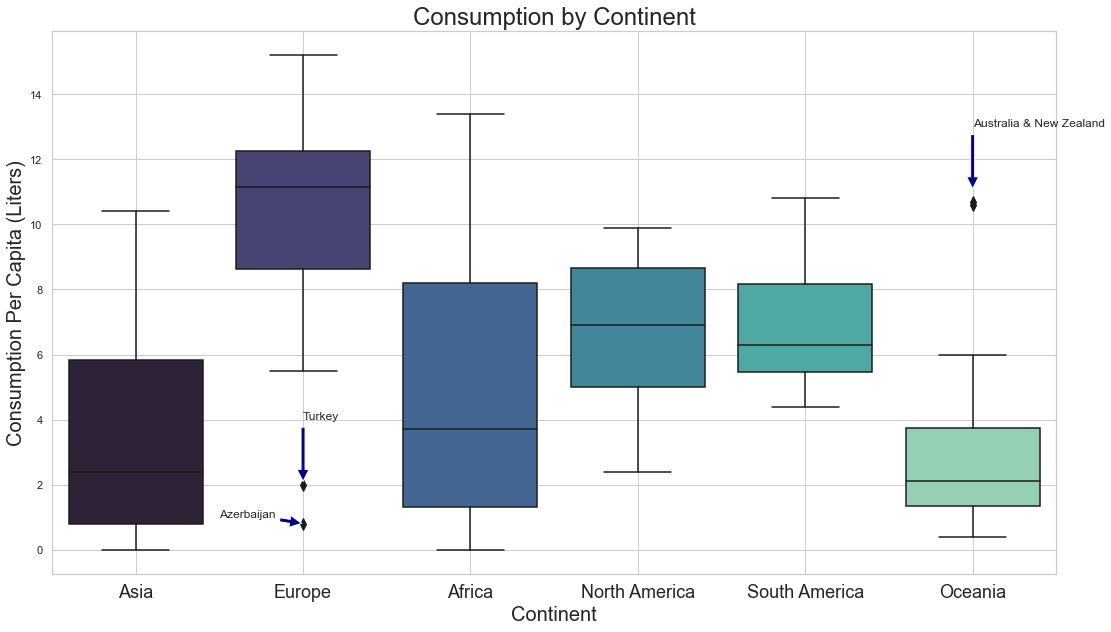

In [122]:
# Set boxplot figsize
sn.set(rc={'figure.figsize':(18,10)})

# Set colors for boxplot
sn.set_palette("mako") 
sn.set_style("whitegrid")

# Create boxplot
plot = sn.boxplot( x=df["continent"], y=df["consumption_per_capita_(L)"], fliersize=8) 
plt.title("Consumption by Continent", fontsize=24) 
plt.ylabel("Consumption Per Capita (Liters)", fontsize=20) 
plt.xlabel("Continent", fontsize=20)
plt.xticks(fontsize=18, rotation=0)

# Highlight and label the outliers
plt.annotate('Australia & New Zealand', xy =(5, 11), xytext =(5, 13),
arrowprops = dict(facecolor ='darkblue', shrink = 0.05),) 
plt.annotate('Azerbaijan', xy =(1, .8), xytext =(.5,1),
             arrowprops = dict(facecolor ='darkblue', shrink = 0.05),) 
plt.annotate('Turkey', xy =(1, 2), xytext =(1, 4),
             arrowprops = dict(facecolor ='darkblue', shrink = 0.05),) 


plot.grid(True)
plt.gcf()


plt.savefig("images/4_continent_boxplot.png")


In [125]:
# Create containers and conditionals for for loop
continents = ['Africa', 'Asia', 'Europe', 'North America', 'South America', 'Oceania']
values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for continent in continents:
    df = df_copy.loc[df_copy["continent"] == continent]
    
    # Create a series that consists of all final volume values for each regimen
    values = df_copy['consumption_per_capita_(L)']
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {continent}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {continent}: {lower_bound}')
    print(f'Upper Bound for {continent}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(df_copy['consumption_per_capita_(L)'] >= upper_bound) | 
                                        (df_copy['consumption_per_capita_(L)'] <= lower_bound)]).count()
    print(f'Number of {continent} outliers: {outliers_count}')

IQR for Africa: 6.9750000000000005
Lower Bound for Africa: -8.037500000000001
Upper Bound for Africa: 19.8625
Number of Africa outliers: 0
IQR for Asia: 6.9750000000000005
Lower Bound for Asia: -8.037500000000001
Upper Bound for Asia: 19.8625
Number of Asia outliers: 0
IQR for Europe: 6.9750000000000005
Lower Bound for Europe: -8.037500000000001
Upper Bound for Europe: 19.8625
Number of Europe outliers: 0
IQR for North America: 6.9750000000000005
Lower Bound for North America: -8.037500000000001
Upper Bound for North America: 19.8625
Number of North America outliers: 0
IQR for South America: 6.9750000000000005
Lower Bound for South America: -8.037500000000001
Upper Bound for South America: 19.8625
Number of South America outliers: 0
IQR for Oceania: 6.9750000000000005
Lower Bound for Oceania: -8.037500000000001
Upper Bound for Oceania: 19.8625
Number of Oceania outliers: 0


In [128]:
# Identify the outliers in the Oceania subset data
oceania_df = df_copy.loc[df_copy['continent'] == 'Oceania']
outliers_oceania = oceania_df.loc[(oceania_df['consumption_per_capita_(L)'] >= 7.3500000000000005) | 
                                        (oceania_df['consumption_per_capita_(L)'] <= -2.250000000000001)] 

#outliers_oceania

formatted_oceania = outliers_oceania['country'].tolist() 

#print("The outliers noted in the Oceania subset: " + ", ".join(formatted_oceania))  


In [129]:
# Identify the outliers in the Europe subset data
europe_df = df_copy.loc[df_copy['continent'] == 'Europe']
outliers_europe = europe_df.loc[(europe_df['consumption_per_capita_(L)'] >= 17.687500000000004) | 
                                        (europe_df['consumption_per_capita_(L)'] <= 3.1874999999999973)] 
#outliers_europe

formatted_europe = outliers_europe['country'].tolist() 
#print("The outliers noted in the Europe subset: " + ", ".join(formatted_europe)) 

In [130]:
print("The outliers noted in the Oceania subset: " + ", ".join(formatted_oceania))  
print("The outliers noted in the Europe subset: " + ", ".join(formatted_europe)) 


The outliers noted in the Oceania subset: Australia, New Zealand
The outliers noted in the Europe subset: Azerbaijan, Turkey
